In [6]:
import scipy.spatial as spatial
import numpy as np
import timeit
import matplotlib.pyplot as plt
import math

def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)
    return wrapped

## k-Nearest Neighbout Search with kd-trees

### Building a kd tree in 2D will take O(N·logN) time  

In [7]:
data_counts = range(1,1001,100)

running_time_1 = []
for data_count in data_counts:
    S = np.random.randint(50, size=(data_count, 2))    
    tree_build_2d_wrapped = wrapper(spatial.KDTree,S)
    
    average = []
    for i in range(3):
        average.append(timeit.timeit(tree_build_2d_wrapped, number=1000))
    time = sum(average)/len(average)
    running_time_1.append(time)

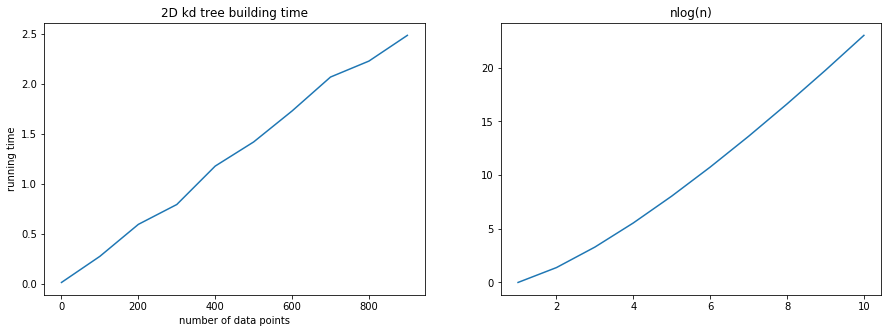

In [70]:
nlogn = []
for v in  range(1,11):
    nlogn.append(v * math.log(v))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
ax1.plot(data_counts, running_time_1)
ax1.set(xlabel="number of data points", ylabel="running time")
ax1.set_title("2D kd tree building time")
ax2.plot(range(1,11), nlogn)
ax2.set_title("nlog(n)")
plt.show()

### Search knn(k=1) in 2d kd tree
### Time complexity to find the k(=1) nearest neighbor for a 2D point in kd tree is around log(N) for each point, worst case O(N) for maximum backtracking and traverse

In [47]:
k = 1
population = range(1,10001,500)

running_time_2 = []
for pop in population:
    S = np.random.randint(100, size=(pop, 2))
    tree = spatial.KDTree(S)
    target_points = np.random.randint(500, size=(1000, 2))
    knn_search_target_wrapped = wrapper(tree.query, target_points, k)
    running_time_2.append(timeit.timeit(knn_search_target_wrapped, number=10))

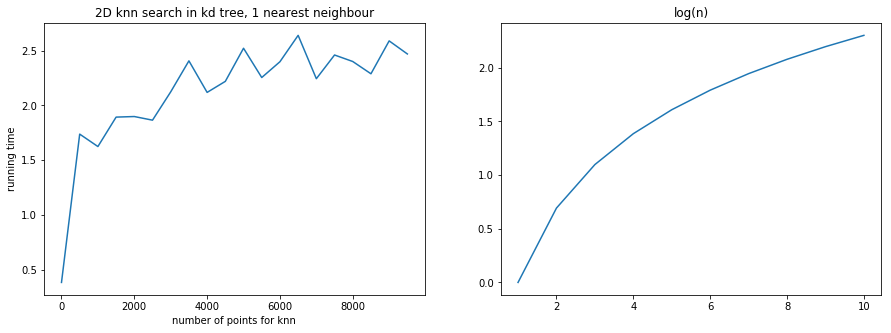

In [69]:
nlogn2 = []
for v in  range(1,11):
    nlogn2.append(math.log(v))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
ax1.plot(population, running_time_2)
ax1.set(xlabel="number of points for knn", ylabel="running time")
ax1.set_title("2D knn search in kd tree, 1 nearest neighbour")
ax2.plot(range(1,11), nlogn2)
ax2.set_title("log(n)")
plt.show()

### Building kd tree for k dimensions will take O(k*nlog(n)) time if a O(nlog(n)) sort is used prior to building the tree

In [62]:
dimensions = range(1,10)
running_time_n_tree = []

for dimension in dimensions:
    S = np.random.randint(100, size=(10000, dimension))
    tree_wrapped = wrapper(spatial.KDTree, S)
    average = []
    for i in range(50):
        average.append(timeit.timeit(tree_wrapped, number=10))
        
    time = sum(average)/len(average)
    running_time_n_tree.append(time)


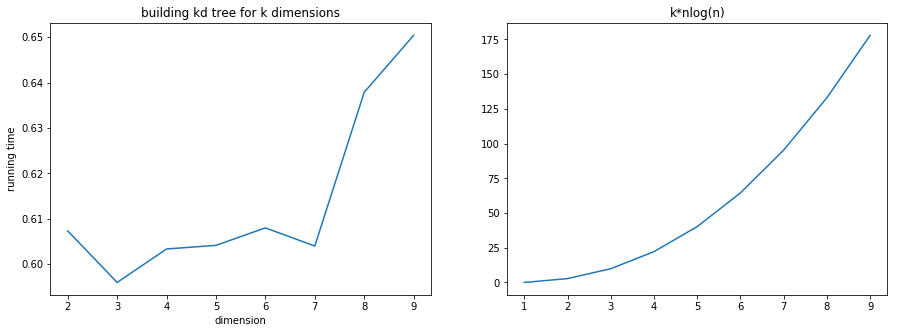

In [68]:
knlogn = []
for v in range(1,10):
    knlogn.append(dimensions[v-1]*v * math.log(v))


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
ax1.plot(dimensions[1:], running_time_n_tree[1:])
ax1.set(xlabel="dimension", ylabel="running time")
ax1.set_title("building kd tree for k dimensions")
ax2.plot(dimensions, knlogn)
ax2.set_title("k*nlog(n)")
plt.show()

### finding 1 nearest neighbor in knn kd tree takes exponential time, because the search space grows with 2^d

In [84]:
k = 1
dimensions = range(2,17)
running_time_n_query = []

for dimension in dimensions:
    S = np.random.randint(100, size=(5000, dimension))
    tree = spatial.KDTree(S)
    target_points = np.random.randint(100, size=(1, dimension))
    query_wrapped = wrapper(tree.query, target_points,k)

    running_time_n_query.append(timeit.timeit(query_wrapped, number=1000))

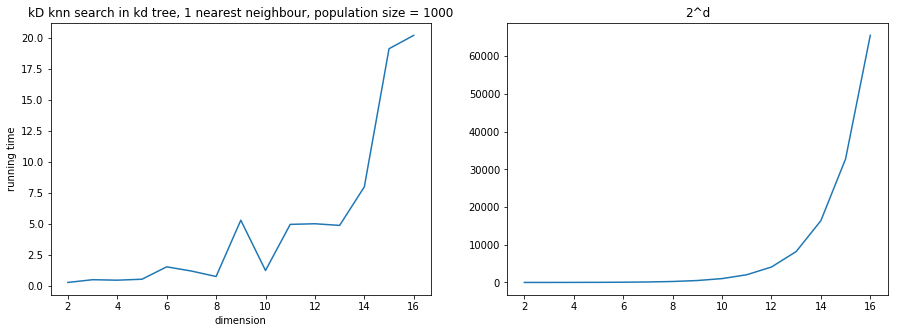

In [85]:
expo = []
for v in range(2,17):
    expo.append(math.pow(2,v))


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
ax1.plot(dimensions, running_time_n_query)
ax1.set(xlabel="dimension", ylabel="running time")
ax1.set_title("kD knn search in kd tree, 1 nearest neighbour, population size = 1000")
ax2.plot(dimensions, expo)
ax2.set_title("2^d")
plt.show()